### Código LEC1 2024-2

Grupo A 

In [2]:
#Importamos pandas - para instalar: pip install pandas, pip install matplotlib y pip install numpy en terminal
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importación de los datos

df = pd.read_csv('data.csv')

- Preguntas 3.1

3.1.a.1 ¿Cuántos géneros de música elegidos como favoritos hay?

3.1.a.2 ¿Qué porcentaje abarca cada género de música?

3.1.a.3 ¿Qué porcentaje abarca cada género de música elegido como favorito por personas que respondieron que la música 
mejora las condiciones de su salud mental?

In [ ]:
# Para responder a 3.1.a.1
print("La cantidad de géneros escogidos como favoritos es:")
df['Fav genre'].nunique()

# Gráfico

In [ ]:
# Para responder a 3.1.a.2
i = 0
valor = df['Fav genre'].value_counts()
while i < 16:
    g = valor.iloc[i]
    genero= valor.index[i]
    porcentaje = math.trunc((g / 737)*100*100)/100
    print("El porcentaje para el genero", genero, "es:", porcentaje, "%")
    i+=1
    
valor1 = pd.DataFrame(valor)
valor1.columns = ['counts']  
valor1['porcentaje'] = (valor1['counts'] / 737) * 100
    
# Gráfico
plt.figure(figsize=(8,4))
valor1['porcentaje'].plot(kind='bar', color='crimson')
plt.title("Porcentaje de veces que se agregó como favorito un género")
plt.xlabel("Género")
plt.ylabel("Porcentaje de favoritos (%)")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Para responder a la pregunta 3.1.a.3
improve = df[df['Music effects'] == 'Improve']
favgenre = improve['Fav genre'].value_counts()
i=0
while i < 16:
    g = favgenre.iloc[i]
    genero= favgenre.index[i]
    porcentaje = math.trunc((g / favgenre.sum())*100*100)/100
    print("El porcentaje para el genero", genero, "es:", porcentaje, "%")
    i+=1

favgenre1 = pd.DataFrame(favgenre)
favgenre1.columns = ['counts']  
favgenre1['porcentaje'] = (favgenre1['counts'] / favgenre.sum()) * 100
    
# Gráfico
plt.figure(figsize=(8,4))
favgenre1['porcentaje'].plot(kind='bar', color='darkviolet')
plt.title("Porcentaje que abarca cada género de música elegido como favorito por personas que respondieron Improve")
plt.xlabel("Género")
plt.ylabel("Porcentaje de favoritos (%)")
plt.xticks(rotation=60)
plt.show()


- Preguntas 3.1

3.1.b  Escoja cualquier género musical dentro del conjunto de datos. ¿Cuál es la moda y el
rango de la frecuencia (Frequency) en la que es escuchada el género de música que
escogió?

In [ ]:
#Para responder a la pregunta 3.1.b

Kpop = df['Frequency [K pop]'].mode()
print("La moda de la frecuencia en la que es escuchado el K-pop es: ", Kpop)

#Al ser datos categoricos no se puede calcular el rango


- Preguntas 3.1

3.1.c Presente un análisis exploratorio de la edad (Age) y de la variable servicio de streaming primario (Primary streaming service). Utilice los estadísticos (media, moda, mediana, desviación estándar, varianza, mínimo, máximo, primer y tercer cuartil) y gráficos más adecuados para cada caso (histogramas, boxplots, etc.)

In [ ]:
#Para responder a la pregunta 3.1.c
EDAD_SS = df.groupby('Primary streaming service')
EPE = EDAD_SS['Age'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max'])
i = 0
servicios = df['Primary streaming service'].unique()
print(EPE)

for servicio in servicios:
    edad_ss = df[df['Primary streaming service'] == servicio]
    edadservicio= edad_ss['Age'].mode()
    print("La moda para el servicio", servicio, "es: ", edadservicio)

num_servicios = len(servicios)
num_cols = 2  
num_rows = (num_servicios + num_cols - 1) // num_cols  

plt.figure(figsize=(num_cols * 5, num_rows * 4))  

for i, servicio in enumerate(servicios):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[df['Primary streaming service'] == servicio]['Age'], kde=False, bins=15)
    plt.title(f"Edad - {servicio}")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    
plt.tight_layout()
plt.show()

- Preguntas 3.1

3.1.d ¿Cuántos beats por minuto (BPM) tiene la respuesta del encuestado cuyo género favorito tiene más beats por minuto que el 90% de los encuestados?, ¿qué porcentaje de los encuestados tiene en su género favorito más de 95 beats por minutos? y ¿qué se puede concluir de estos valores?

In [ ]:
#Para la pregunta 3.1.d
percentil_90 = df['BPM'].quantile(0.9)

arriba_90 = df[df['BPM'] > percentil_90]['BPM'].min()
print(f"El BPM del género favorito que tiene más BPM que el 90% de los encuestados es: {arriba_90}")

# Porcentaje de los encuestados que tienen en su genero favorito más de 95 beats por minuto
arriba_95 = df[df['BPM'] >= 95]
porcentaje = math.trunc((arriba_95.shape[0] / 737)*100*100)/100
print(f"El porcentaje total de los encuestados que tienen en su genero favorito más de 95 beats es: {porcentaje}")


- Preguntas 3.1

3.1.e Indique la asimetría y curtosis de las horas por día (Hours per day) que se escucha música. ¿Qué se puede concluir de la distribución de los datos a partir de estos valores? Complemente su explicación con un gráfico y estadístico adecuado

<Figure size 1400x700 with 0 Axes>

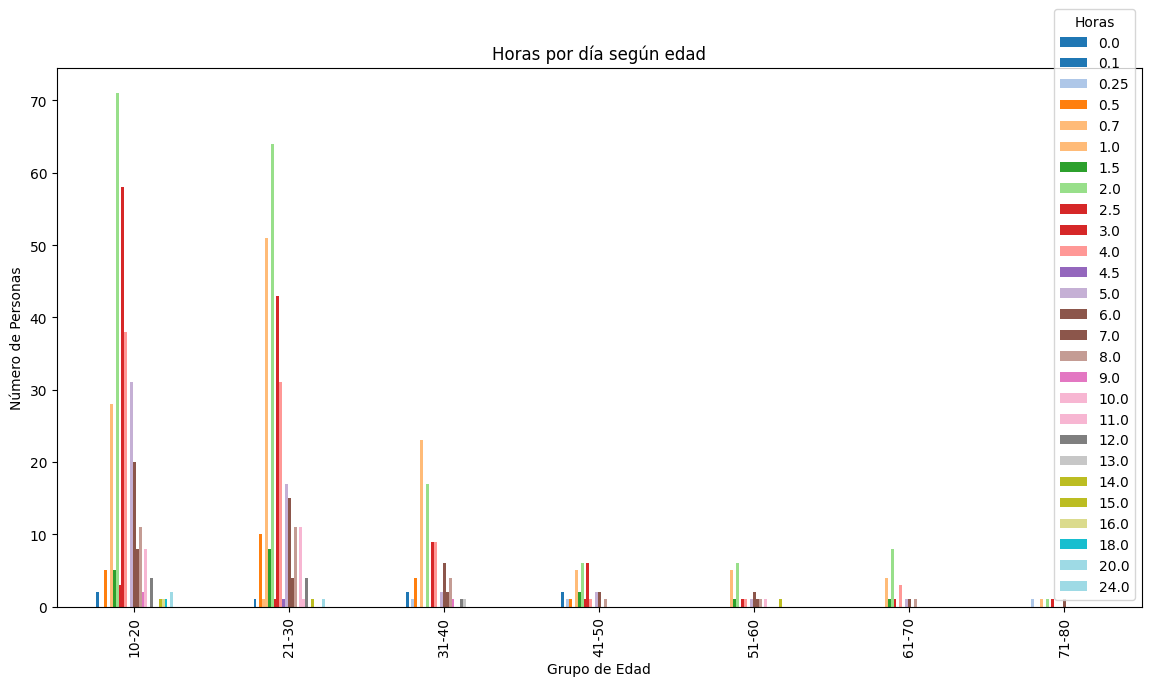

In [45]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grupito = pd.crosstab(df['Age Group'], df['Hours per day'])

plt.figure(figsize=(14, 7))
grupito.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab20')
plt.title("Horas por día según edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Número de Personas")
plt.legend(title="Horas")
plt.show()